# **Automatic Number Plate Recognition**<a href="#Automatic-Number-Plate-Recognition" class="anchor-link">¶</a>

**Introduction:**

A Python project for extracting information about a car registration
number from a photograph.

**Steps:**

1.  Install and Import Dependecies
2.  Read image in grayscale and blur
3.  Apply a filter and find the edges for localization
4.  Find Contours and apply mask
5.  Use Easy OCR to read text
6.  Render result

# CAR 1<a href="#CAR-1" class="anchor-link">¶</a>


    import cv2


    !pip install easyocr
    !pip install imutils

    Collecting easyocr
      Downloading easyocr-1.4.1-py3-none-any.whl (63.6 MB)
         |████████████████████████████████| 63.6 MB 77 kB/s
    Requirement already satisfied: numpy in /usr/local/lib/python3.7/dist-packages (from easyocr) (1.21.5)
    Requirement already satisfied: torchvision>=0.5 in /usr/local/lib/python3.7/dist-packages (from easyocr) (0.11.1+cu111)
    Requirement already satisfied: PyYAML in /usr/local/lib/python3.7/dist-packages (from easyocr) (3.13)
    Collecting python-bidi
      Downloading python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
    Requirement already satisfied: Pillow<8.3.0 in /usr/local/lib/python3.7/dist-packages (from easyocr) (7.1.2)
    Collecting opencv-python-headless
      Downloading opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.8 MB)
         |████████████████████████████████| 47.8 MB 60 kB/s
    Requirement already satisfied: scikit-image in /usr/local/lib/python3.7/dist-packages (from easyocr) (0.18.3)
    Requirement already satisfied: scipy in /usr/local/lib/python3.7/dist-packages (from easyocr) (1.4.1)
    Requirement already satisfied: torch in /usr/local/lib/python3.7/dist-packages (from easyocr) (1.10.0+cu111)
    Requirement already satisfied: typing-extensions in /usr/local/lib/python3.7/dist-packages (from torch->easyocr) (3.10.0.2)
    Requirement already satisfied: six in /usr/local/lib/python3.7/dist-packages (from python-bidi->easyocr) (1.15.0)
    Requirement already satisfied: tifffile>=2019.7.26 in /usr/local/lib/python3.7/dist-packages (from scikit-image->easyocr) (2021.11.2)
    Requirement already satisfied: matplotlib!=3.0.0,>=2.0.0 in /usr/local/lib/python3.7/dist-packages (from scikit-image->easyocr) (3.2.2)
    Requirement already satisfied: imageio>=2.3.0 in /usr/local/lib/python3.7/dist-packages (from scikit-image->easyocr) (2.4.1)
    Requirement already satisfied: networkx>=2.0 in /usr/local/lib/python3.7/dist-packages (from scikit-image->easyocr) (2.6.3)
    Requirement already satisfied: PyWavelets>=1.1.1 in /usr/local/lib/python3.7/dist-packages (from scikit-image->easyocr) (1.3.0)
    Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib!=3.0.0,>=2.0.0->scikit-image->easyocr) (1.4.0)
    Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib!=3.0.0,>=2.0.0->scikit-image->easyocr) (3.0.7)
    Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.7/dist-packages (from matplotlib!=3.0.0,>=2.0.0->scikit-image->easyocr) (0.11.0)
    Requirement already satisfied: python-dateutil>=2.1 in /usr/local/lib/python3.7/dist-packages (from matplotlib!=3.0.0,>=2.0.0->scikit-image->easyocr) (2.8.2)
    Installing collected packages: python-bidi, opencv-python-headless, easyocr
    Successfully installed easyocr-1.4.1 opencv-python-headless-4.5.5.64 python-bidi-0.4.2

    Requirement already satisfied: imutils in /usr/local/lib/python3.7/dist-packages (0.5.4)

In \[ \]:

    import numpy as np
    import matplotlib.pyplot as plt
    import imutils #hepls cv2 in contour and edge detection
    import easyocr #helps read characters in an image

In \[ \]:

    img = cv2.imread('image1.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray,cmap='gray')

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3b263d450>

![](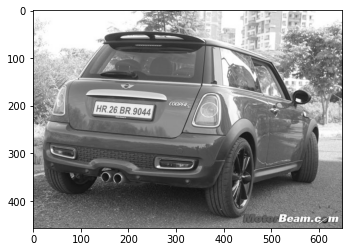%0A)

In \[ \]:

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Canny Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3af339210>

![](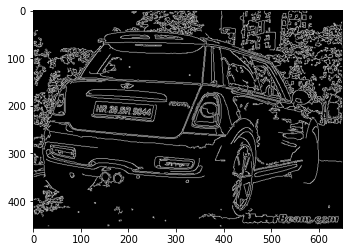%0A)

In \[ \]:

    keypoints = cv2.findContours(edged.copy(),
                cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints) #finds contours in the edge map
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #sorts the contours

In \[ \]:

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True) #approximates the shape of the contour and gives it location
        if len(approx) == 4:
            location = approx
            break

In \[ \]:

    location

Out\[ \]:

    array([[[122, 219]],

           [[246, 227]],

           [[252, 200]],

           [[132, 191]]], dtype=int32)

In \[ \]:

    mask = np.zeros(gray.shape, np.uint8) #mask to hide the image except the license plate
    new_image = cv2.drawContours(mask, [location], 0,255, -1) #draw a box around the contour
    new_image = cv2.bitwise_and(img, img, mask=mask) #gives the image with license plate only

In \[ \]:

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3ad645ad0>

![](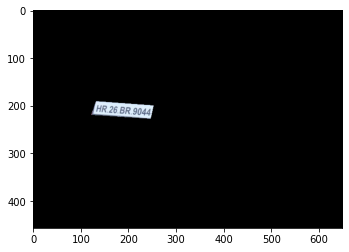%0A)

In \[ \]:

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1] #cropped image of license plate

In \[ \]:

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3ad5d8050>

![](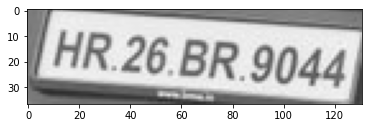%0A)

In \[ \]:

    reader = easyocr.Reader(['en']) #helps reads english characters
    result = reader.readtext(cropped_image) #gives the characters in the plate and the position
    result

    Downloading detection model, please wait. This may take several minutes depending upon your network connection.

    Downloading recognition model, please wait. This may take several minutes depending upon your network connection.

Out\[ \]:

    [([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5823521921587151)]

In \[ \]:

    text = result[0][-2] #slices the text
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa5a6c90>

![](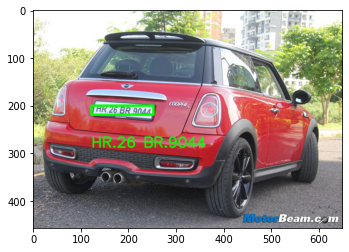%0A)

# CAR2<a href="#CAR2" class="anchor-link">¶</a>

In \[ \]:

    img = cv2.imread('image4.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa5685d0>

![](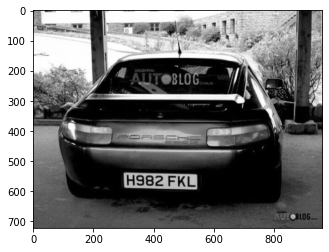%0A)

In \[ \]:

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa51be90>

![](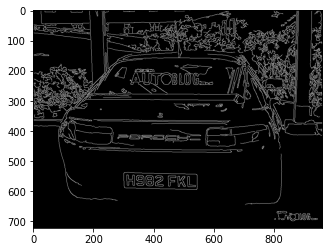%0A)

In \[ \]:

    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In \[ \]:

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

In \[ \]:

    location

Out\[ \]:

    array([[[300, 540]],

           [[306, 589]],

           [[543, 592]],

           [[538, 543]]], dtype=int32)

In \[ \]:

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

In \[ \]:

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa417250>

![](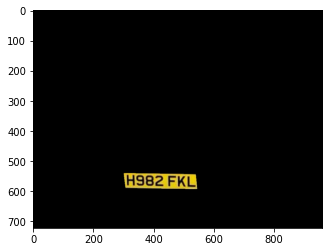%0A)

In \[ \]:

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

In \[ \]:

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa42b2d0>

![](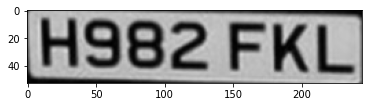%0A)

In \[ \]:

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    result

Out\[ \]:

    [([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9757375847177501)]

In \[ \]:

    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3a9fbec50>

![](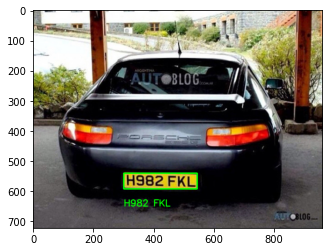%0A)

# car 3<a href="#car-3" class="anchor-link">¶</a>

In \[ \]:

    img = cv2.imread('image 5.jpeg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3ab1bae10>

![](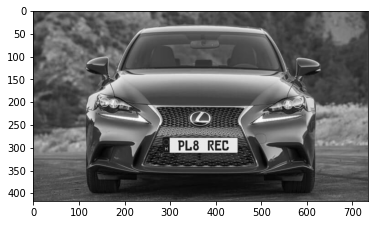%0A)

In \[ \]:

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3ab1b8b90>

![](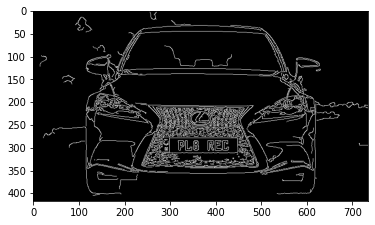%0A)

In \[ \]:

    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In \[ \]:

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

In \[ \]:

    location

Out\[ \]:

    array([[[299, 279]],

           [[447, 278]],

           [[449, 308]],

           [[301, 311]]], dtype=int32)

In \[ \]:

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

In \[ \]:

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa977850>

![](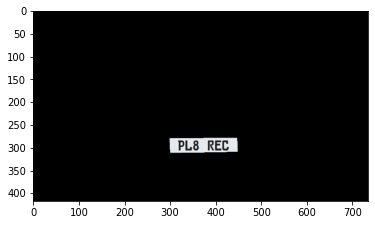%0A)

In \[ \]:

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

In \[ \]:

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa9425d0>

![](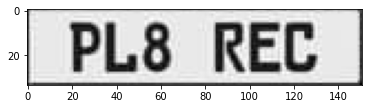%0A)

In \[ \]:

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    result

Out\[ \]:

    [([[16, 2], [70, 2], [70, 34], [16, 34]], 'PL8', 0.9962177587182923),
     ([[80, 2], [136, 2], [136, 34], [80, 34]], 'REC', 0.9998042628008458)]

In \[ \]:

    text = result[0][-2]+result[1][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa3a1c50>

![](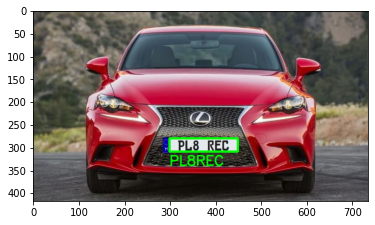%0A)

# CAR 4(DIFFICULTY FACED)<a href="#CAR-4(DIFFICULTY-FACED)" class="anchor-link">¶</a>

In \[ \]:

    img = cv2.imread('image3.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa321a90>

![](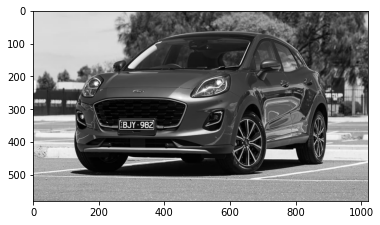%0A)

In \[ \]:

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa905d10>

![](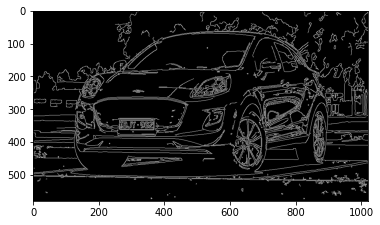%0A)

In \[ \]:

    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In \[ \]:

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

In \[ \]:

    location

Out\[ \]:

    array([[[263, 334]],

           [[264, 363]],

           [[369, 362]],

           [[366, 333]]], dtype=int32)

In \[ \]:

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

In \[ \]:

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa283050>

![](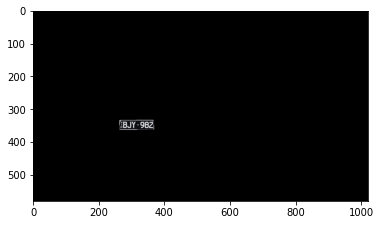%0A)

In \[ \]:

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

In \[ \]:

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa243910>

![](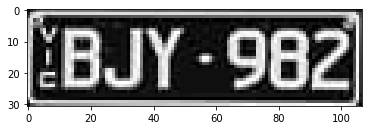%0A)

In \[ \]:

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    result

Out\[ \]:

    [([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.35703880874047256)]

In \[ \]:

    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Out\[ \]:

    <matplotlib.image.AxesImage at 0x7fc3aa8c1e50>

![](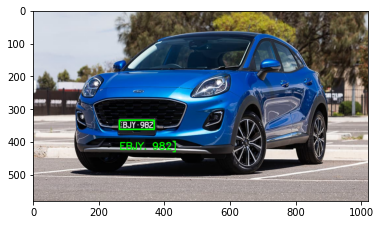%0A)

# CONCLUSION<a href="#CONCLUSION" class="anchor-link">¶</a>

We started with importing all the important dependencies which in the
end proved to be useful for most of the imgages that we tested on.

Results varied with the image along with a good amount of success rate.

While we faced some issue in some characters being recogninzed even
though they were not present we could easily tackle the problem by
slicing.

In \[ \]:

    from google.colab import drive
    drive.mount('/content/drive')